In [381]:
%run ../utils/configuration.ipynb

In [382]:
import sys
import polars as pl

In [383]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [384]:
try:
    df = pl.read_parquet(f'{silver_path}/merge_file.parquet')
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)


## EDA

In [385]:
df.shape

(7043, 50)

In [386]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64


In [387]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [388]:
df.describe()

statistic,customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,f64
"""count""","""7043""","""7043""",7043.0,7043.0,"""7043""","""7043""",7043.0,"""7043""","""7043""","""7043""",7043.0,"""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""","""7043""",7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,"""7043""",7043.0,0.0,7043.0,7043.0,7043.0,"""7043""",7043.0,"""7043""",7043.0,7043.0,7043.0,"""7043""",7043.0,"""7043""","""7043""",7043.0,7043.0,7043.0,"""7043""","""7043""",7043.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,7043.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,null,1.951867,32.386767,null,null,22.958954,null,null,null,20.515405,null,null,null,null,null,null,null,null,null,null,null,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,null,46.509726,null,0.162147,0.483033,0.468692,null,93486.070567,null,36.197455,-119.756684,1.0,null,3.244924,null,null,0.26537,58.50504,4400.295755,null,null,22139.603294
"""std""",null,null,3.001199,24.542061,null,null,15.448113,null,null,null,20.41894,null,null,null,null,null,null,null,null,null,null,null,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,null,16.750352,null,0.368612,0.499748,0.962802,null,1856.767505,null,2.468929,2.154425,0.0,null,1.201657,null,null,0.441561,21.170031,1183.057152,null,null,21152.392837
"""min""","""0002-ORFBO""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""No""","""Cable""",0.0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-Month""","""No""","""Bank Withdrawal""",18.25,18.8,0.0,0.0,0.0,21.36,"""Female""",19.0,null,0.0,0.0,0.0,"""Acampo""",90001.0,"""32.555828, -117.040073""",32.555828,-124.301372,1.0,"""Q3""",1.0,"""Churned""","""No""",0.0,5.0,2003.0,"""Attitude""","""Attitude of service provider""",11.0
"""25%""",null,null,0.0,9.0,null,null,9.21,null,null,null,3.0,null,null,null,null,null,null,null,null,null,null,null,35.5,400.3,0.0,0.0,70.59,605.75,null,32.0,null,0.0,0.0,0.0,null,92101.0,null,33.990646,-121.78809,1.0,null,3.0,null,null,0.0,40.0,3469.0,null,null,2344.0
"""50%""",null,null,0.0,29.0,null,null,22.89,null,null,null,17.0,null,null,null,null,null,null,null,null,null,null,null,70.35,1394.55,0.0,0.0,401.44,2108.64,null,46.0,null,0.0,0.0,0.0,null,93518.0,null,36.205465,-119.595293,1.0,null,3.0,null,null,0.0,61.0,4527.0,null,null,17554.0
"""75%""",null,null,3.0,55.0,null,null,36.4,null,null,null,27.0,null,null,null,null,null,null,null,null,null,null,null,89.85,3789.2,0.0,0.0,1191.5,4801.93,null,60.0,null,0.0,1.0,0.0,null,95329.0,null,38.161321,-117.969795,1.0,null,4.0,null,null,1.0,76.0,5381.0,null,null,36125.0
"""max""","""9995-HOTOH""","""Yes""",11.0,72.0,"""Offer E""","""Yes""",49.99,"""Yes""","""Yes""","""None""",85.0,"""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two Year""","""Yes""","""Mailed Check""",

In [389]:
df.schema

Schema([('customer_id', String),
        ('referred_a_friend', String),
        ('number_of_referrals', Int64),
        ('tenure_in_months', Int64),
        ('offer', String),
        ('phone_service', String),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', String),
        ('internet_service', String),
        ('internet_type', String),
        ('avg_monthly_gb_download', Int64),
        ('online_security', String),
        ('online_backup', String),
        ('device_protection_plan', String),
        ('premium_tech_support', String),
        ('streaming_tv', String),
        ('streaming_movies', String),
        ('streaming_music', String),
        ('unlimited_data', String),
        ('contract', String),
        ('paperless_billing', String),
        ('payment_method', String),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', Int64),
        ('total_lo

In [390]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [391]:
df.select(pl.all().n_unique())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
7043,2,12,72,6,2,3584,2,2,4,50,2,2,2,2,2,2,2,2,3,2,3,1585,6540,500,16,6110,6996,2,62,1,2,2,10,1106,1626,1679,1626,1625,1,1,5,3,2,2,81,3438,6,21,1569


In [392]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (7_043, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 8668-KNZTI  │
│ 4178-EGMON  │
│ 6729-FZWSY  │
│ 2961-VNFKL  │
│ 5934-TSSAU  │
│ …           │
│ 9317-WZPGV  │
│ 5781-BKHOP  │
│ 2165-VOEGB  │
│ 6509-TSGWN  │
│ 3452-GWUIN  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 3                   │
│ 9                   │
│ 6                   │
│ 0                   │
│ 4                   │
│ …                   │
│ 7                   │
│ 8                   │
│ 5                   │
│ 2                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_mo

In [393]:
df.select(pl.col(pl.NUMERIC_DTYPES)).describe()

C:\Users\Danie\AppData\Local\Temp\ipykernel_44872\3086008548.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df.select(pl.col(pl.NUMERIC_DTYPES)).describe()


statistic,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,0.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,46.509726,null,0.162147,0.483033,0.468692,93486.070567,36.197455,-119.756684,1.0,3.244924,0.26537,58.50504,4400.295755,22139.603294
"""std""",3.001199,24.542061,15.448113,20.41894,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,16.750352,null,0.368612,0.499748,0.962802,1856.767505,2.468929,2.154425,0.0,1.201657,0.441561,21.170031,1183.057152,21152.392837
"""min""",0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.36,19.0,null,0.0,0.0,0.0,90001.0,32.555828,-124.301372,1.0,1.0,0.0,5.0,2003.0,11.0
"""25%""",0.0,9.0,9.21,3.0,35.5,400.3,0.0,0.0,70.59,605.75,32.0,null,0.0,0.0,0.0,92101.0,33.990646,-121.78809,1.0,3.0,0.0,40.0,3469.0,2344.0
"""50%""",0.0,29.0,22.89,17.0,70.35,1394.55,0.0,0.0,401.44,2108.64,46.0,null,0.0,0.0,0.0,93518.0,36.205465,-119.595293,1.0,3.0,0.0,61.0,4527.0,17554.0
"""75%""",3.0,55.0,36.4,27.0,89.85,3789.2,0.0,0.0,1191.5,4801.93,60.0,null,0.0,1.0,0.0,95329.0,38.161321,-117.969795,1.0,4.0,1.0,76.0,5381.0,36125.0
"""max""",11.0,72.0,49.99,85.0,118.75,8684.8,49.79,150.0,3564.72,11979.34,80.0,null,1.0,1.0,9.0,96150.0,41.962127,-114.192901,1.0,5.0,1.0,96.0,6500.0,105285.0


In [394]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_44872\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


In [395]:
df_numerical_variables.columns

['number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'count',
 'satisfaction_score',
 'churn_value',
 'churn_score',
 'cltv',
 'population']

In [396]:
df_numerical_variables = df_numerical_variables.drop(['under_30', 'count'])


In [397]:
df_numerical_variables

number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,satisfaction_score,churn_value,churn_score,cltv,population
i64,i64,f64,i64,f64,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64
0,1,0.0,8,39.65,39.65,0.0,20,0.0,59.65,78,1,0,0,90022,34.02381,-118.156582,3,1,91,5433,68701
1,8,48.85,17,80.65,633.3,0.0,0,390.8,1024.1,74,1,1,1,90063,34.044271,-118.185237,3,1,69,5302,55668
0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,71,1,0,3,90065,34.108833,-118.229715,2,1,81,3179,47534
1,25,19.76,12,98.5,2514.5,13.43,0,494.0,2995.07,78,1,1,1,90303,33.936291,-118.332639,2,1,88,5337,27778
1,37,6.33,14,76.5,2868.15,0.0,0,234.21,3102.36,80,1,1,1,90602,33.972119,-118.020188,2,1,67,2793,26265
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,72,22.77,0,21.15,1419.4,19.31,0,1639.44,3039.53,30,0,0,0,92285,34.341737,-116.539416,5,0,45,5306,2182
1,24,36.05,24,84.8,1990.5,48.23,0,865.2,2807.47,38,0,1,2,92301,34.667815,-117.536183,3,0,59,2140,18980
4,72,29.66,59,103.2,7362.9,45.38,0,2135.52,9453.04,30,0,1,2,92304,34.559882,-115.637164,4,0,71,5560,42


Correlation between Numerical Variables

<Axes: >

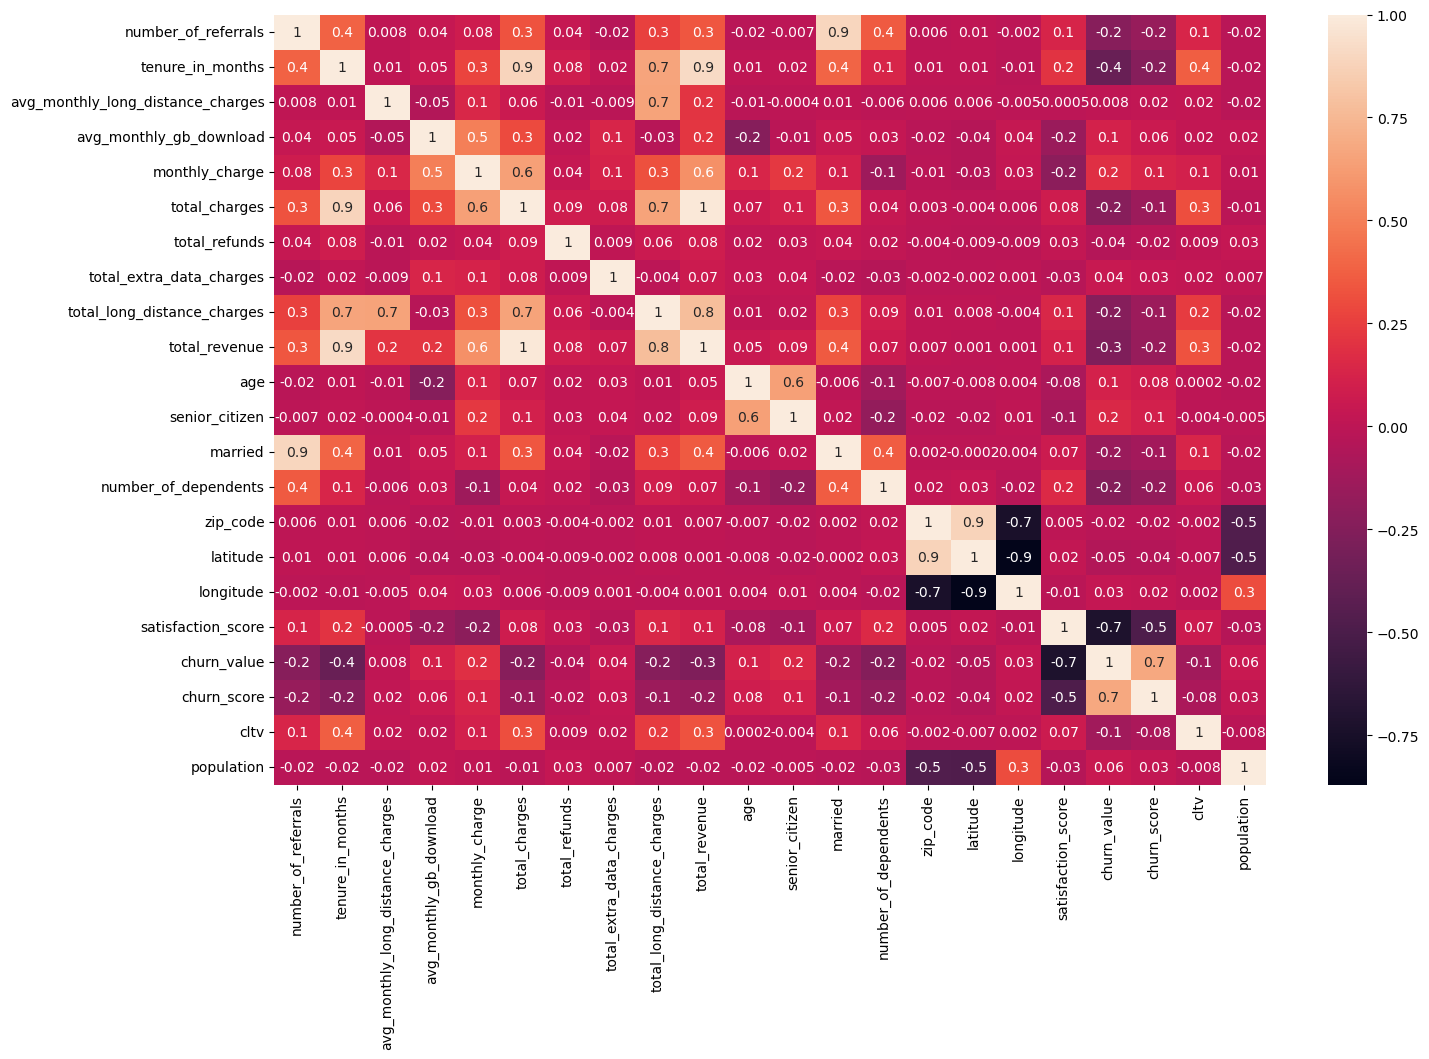

In [398]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [399]:
df_corr

,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,...,married,number_of_dependents,zip_code,latitude,longitude,satisfaction_score,churn_value,churn_score,cltv,population
number_of_referrals,1.000000,0.383039,0.008335,0.037487,0.079701,0.326821,0.036607,-0.024683,0.257349,0.339392,...,0.896375,0.355804,0.006078,0.010598,-0.002444,0.130206,-0.232731,-0.168326,0.131285,-0.020634
tenure_in_months,0.383039,1.000000,0.013885,0.053036,0.275789,0.889476,0.083690,0.019404,0.663367,0.912647,...,0.386613,0.134632,0.010309,0.012727,-0.012146,0.203846,-0.368708,-0.240337,0.366693,-0.018581
avg_monthly_long_distance_charges,0.008335,0.013885,1.000000,-0.048957,0.141125,0.058585,-0.013136,-0.009476,0.651340,0.209445,...,0.010713,-0.006382,0.005983,0.006439,-0.004936,-0.000516,0.008458,0.020947,0.023741,-0.016503
avg_monthly_gb_download,0.037487,0.053036,-0.048957,1.000000,0.498040,0.294928,0.017024,0.131739,-0.026340,0.216682,...,0.047477,0.029472,-0.018173,-0.035523,0.036453,-0.153656,0.110684,0.063442,0.023319,0.024157
monthly_charge,0.079701,0.275789,0.141125,0.498040,1.000000,0.638115,0.036619,0.123377,0.317069,0.569287,...,0.108463,-0.132957,-0.012353,-0.032189,0.030482,-0.209895,0.184743,0.130481,0.107944,0.010469
total_charges,0.326821,0.889476,0.058585,0.294928,0.638115,1.000000,0.087017,0.077756,0.650487,0.978366,...,0.341787,0.042288,0.003422,-0.003904,0.006205,0.077207,-0.231236,-0.145861,0.310290,-0.011741
total_refunds,0.036607,0.083690,-0.013136,0.017024,0.036619,0.087017,1.000000,0.009480,0.061110,0.082239,...,0.039839,0.018136,-0.003880,-0.008792,-0.009177,0.027109,-0.039466,-0.018883,0.008875,0.032727
total_extra_data_charges,-0.024683,0.019404,-0.009476,0.131739,0.123377,0.077756,0.009480,1.000000,-0.003973,0.067299,...,-0.017962,-0.031216,-0.002041,-0.002345,0.001230,-0.028474,0.044648,0.031024,0.024957,0.007387
total_long_distance_charges,0.257349,0.663367,0.651340,-0.026340,0.317069,0.650487,0.061110,-0.003973,1.000000,0.777501,...,0.264729,0.090927,0.009894,0.007660,-0.004343,0.145193,-0.240615,-0.139890,0.240317,-0.024888
total_revenue,0.339392,0.912647,0.209445,0.216682,0.569287,0.978366,0.082239,0.067299,0.777501,1.000000,...,0.352561,0.065317,0.006910,0.001413,0.001002,0.111418,-0.263706,-0.164526,0.323840,-0.018022


In [400]:
for col in df_numerical_variables.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 6                   │
│ 3                   │
│ 9                   │
│ 0                   │
│ 7                   │
│ …                   │
│ 4                   │
│ 8                   │
│ 5                   │
│ 2                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_months
shape: (72, 1)
┌──────────────────┐
│ tenure_in_months │
│ ---              │
│ i64              │
╞══════════════════╡
│ 21               │
│ 9                │
│ 18               │
│ 6                │
│ 24               │
│ …                │
│ 71               │
│ 65               │
│ 62               │
│ 59               │
│ 68               │
└──────────────────┘

Coluna: avg_monthly_long_distance_charges
shape: (3_584, 1)
┌─────────────────────────────────┐
│ avg_monthly_long_distance_char… │
│ ---             

In [401]:
bivalue_columns = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    #,'senior_citizen'
    #,'married'
]

C:\Users\Danie\AppData\Local\Temp\ipykernel_44872\1510456290.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


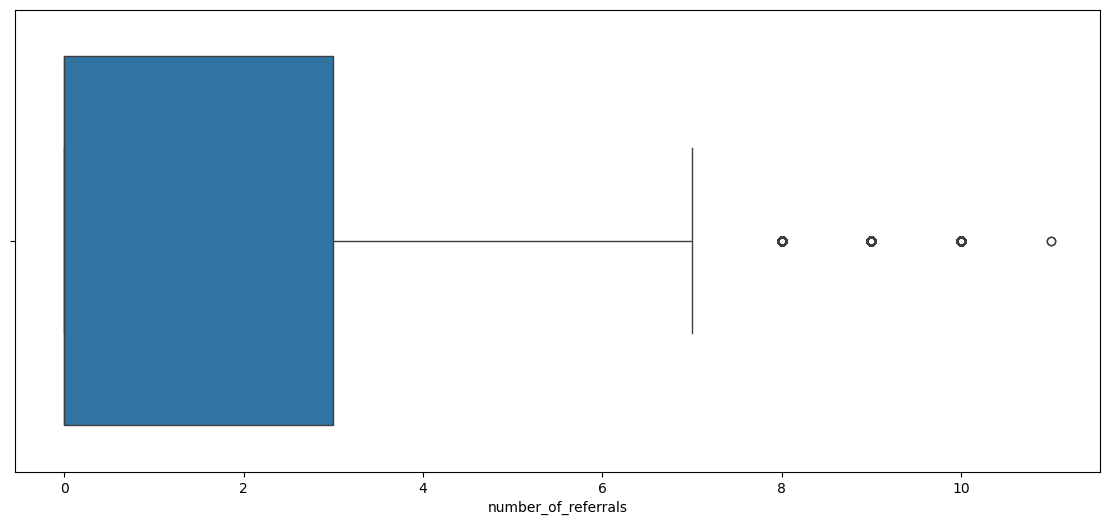

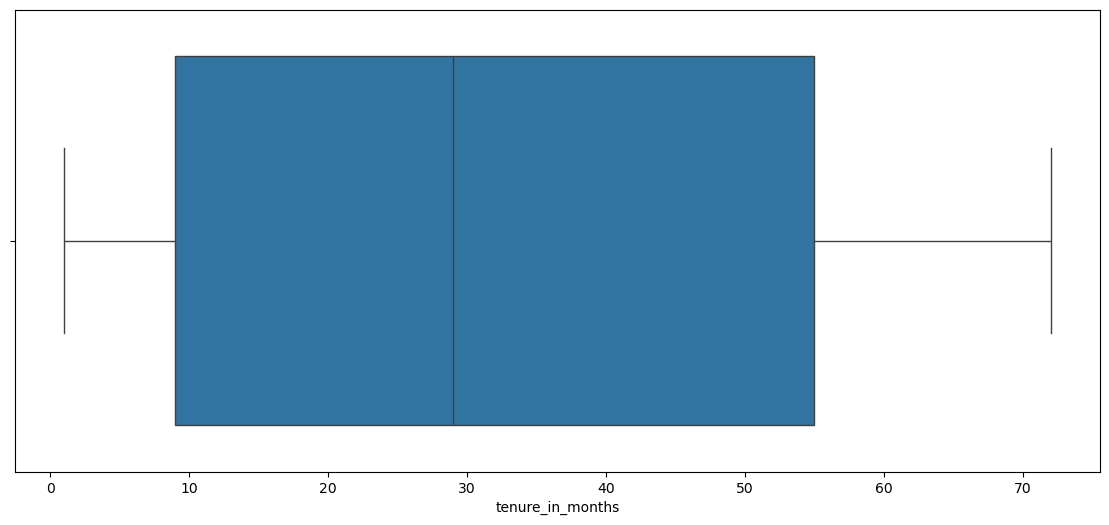

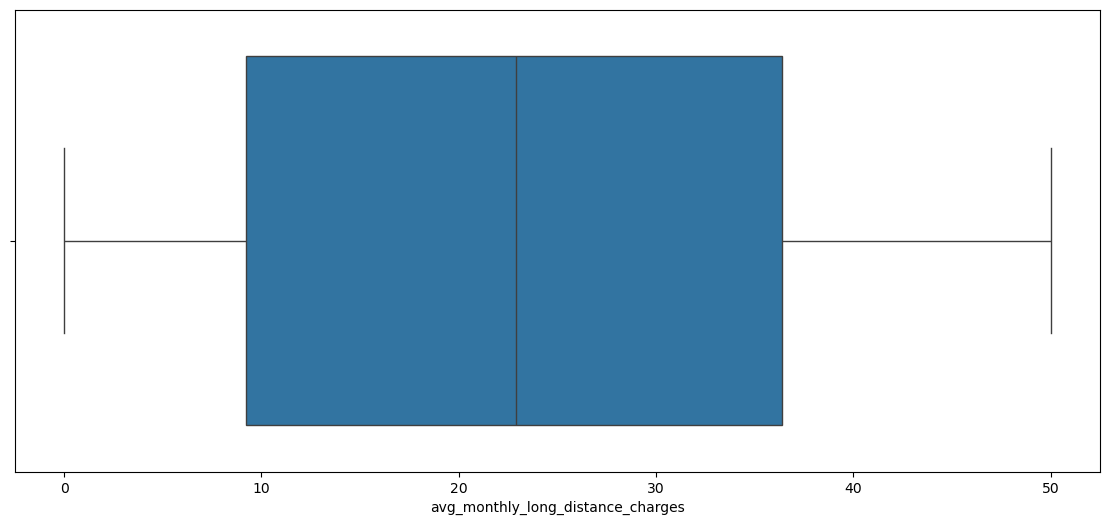

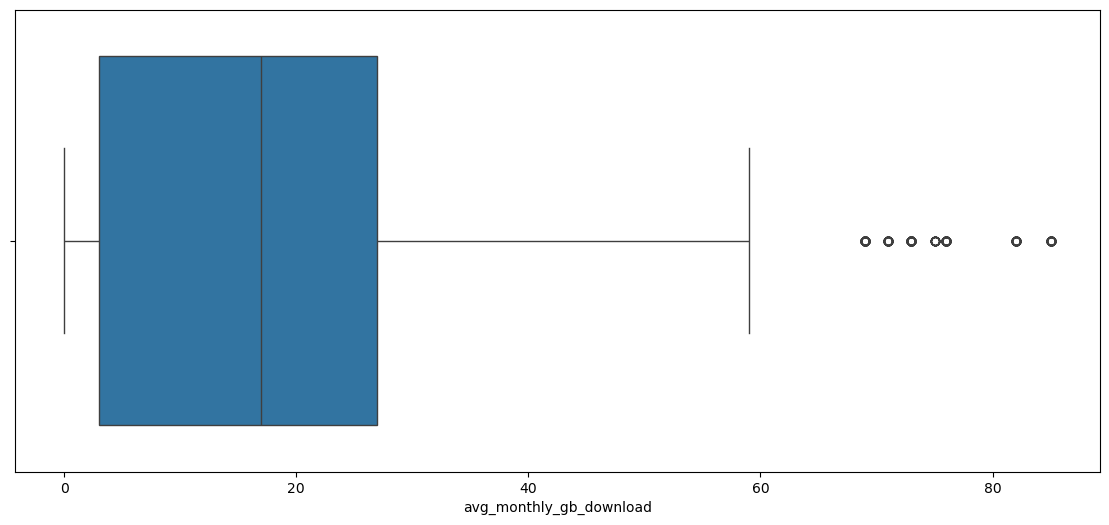

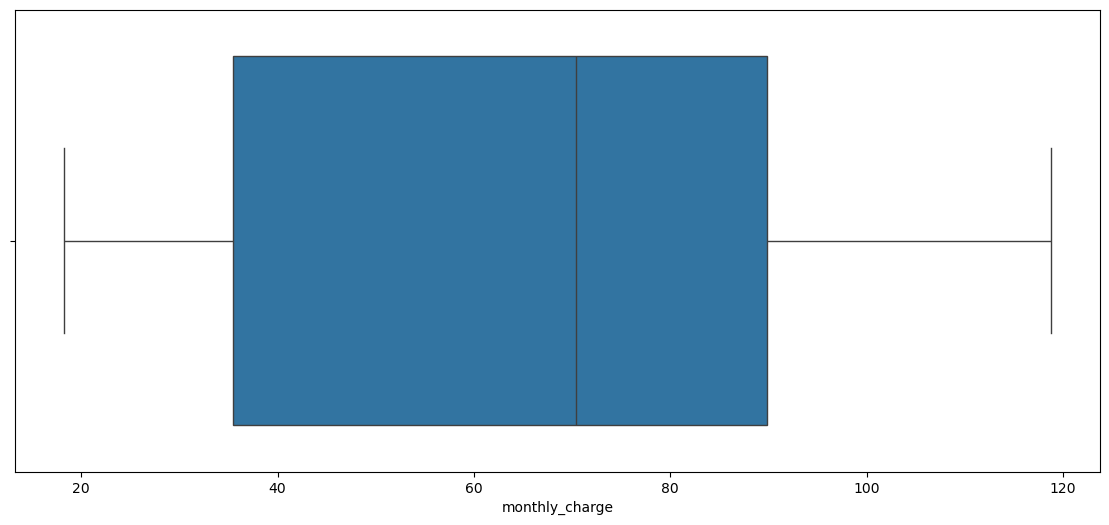

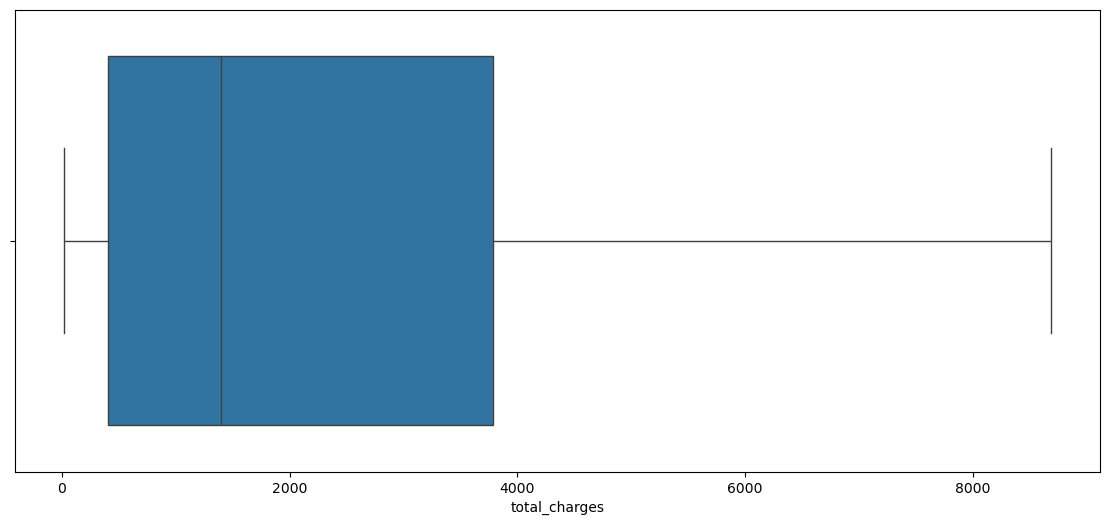

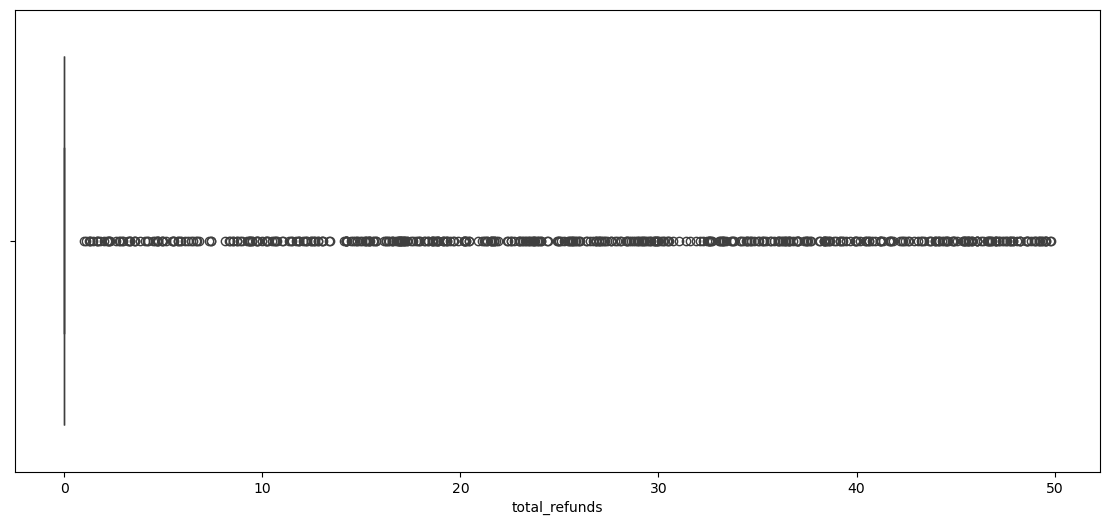

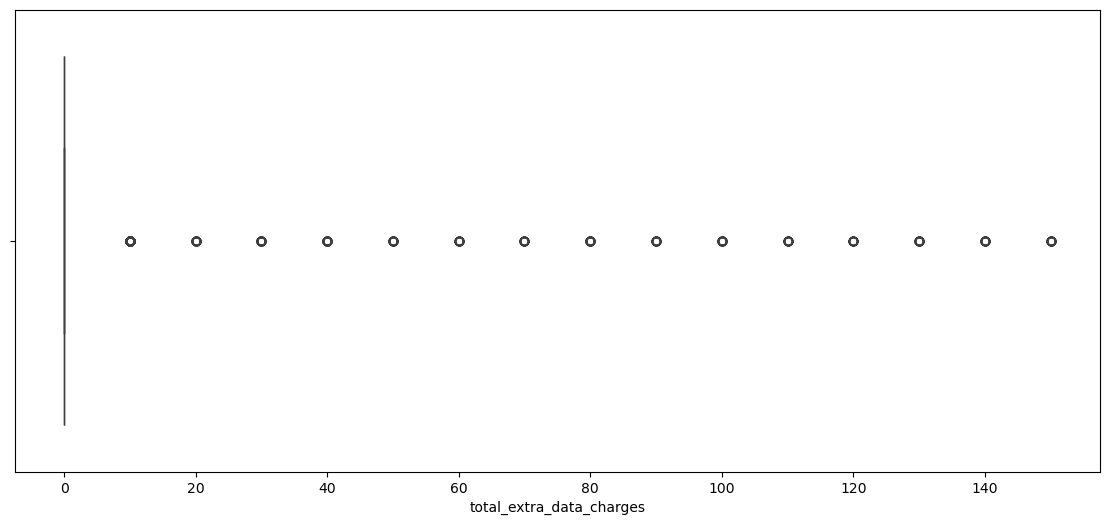

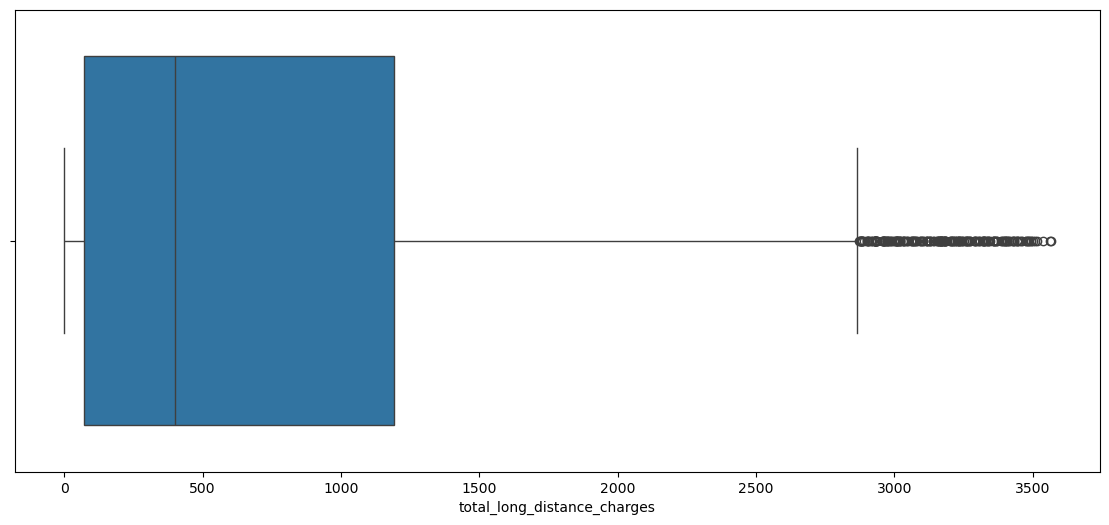

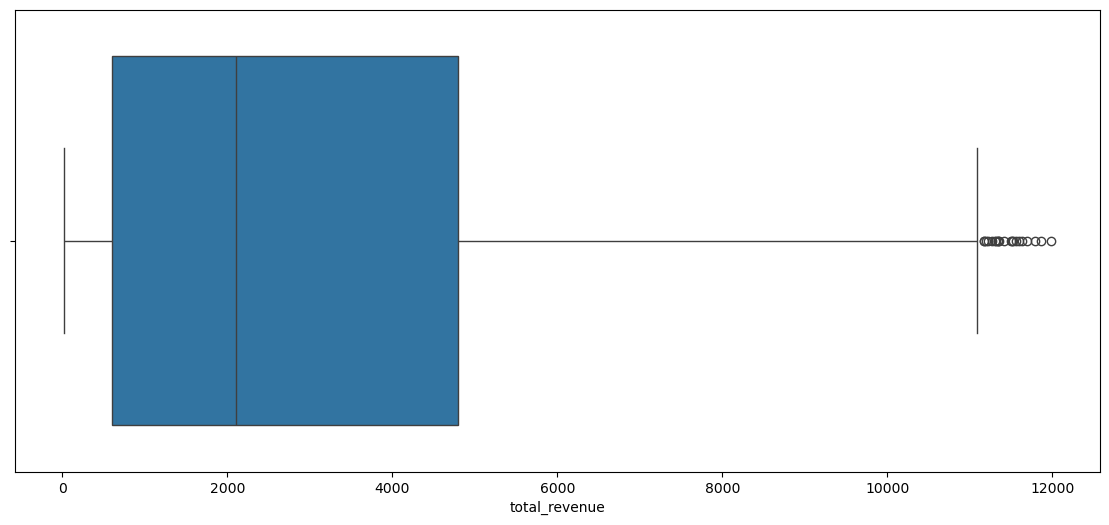

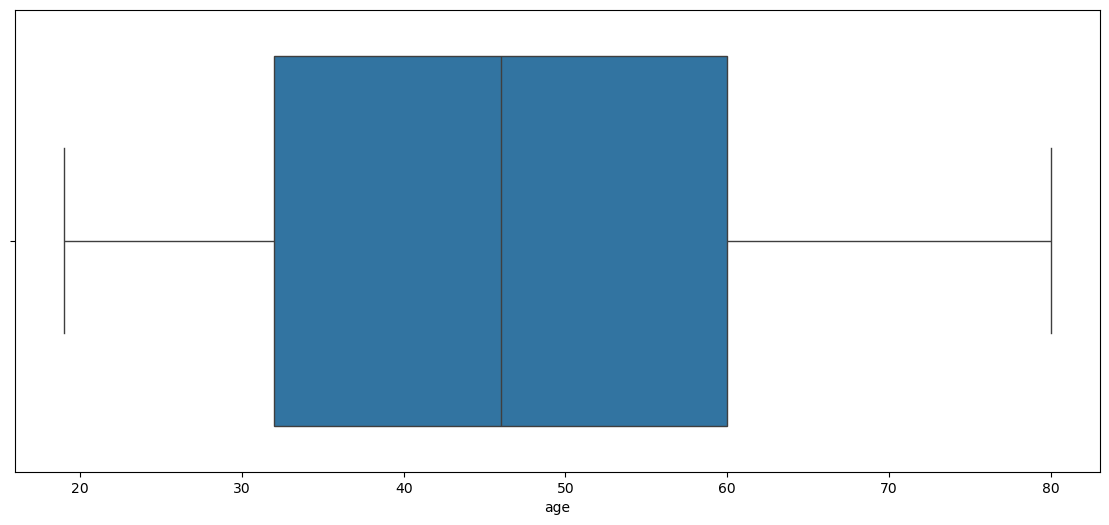

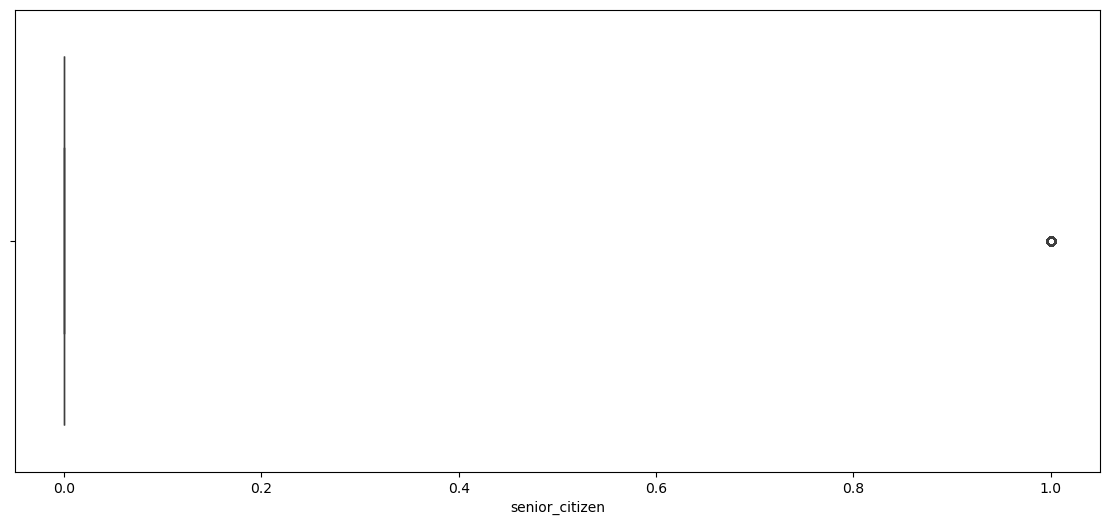

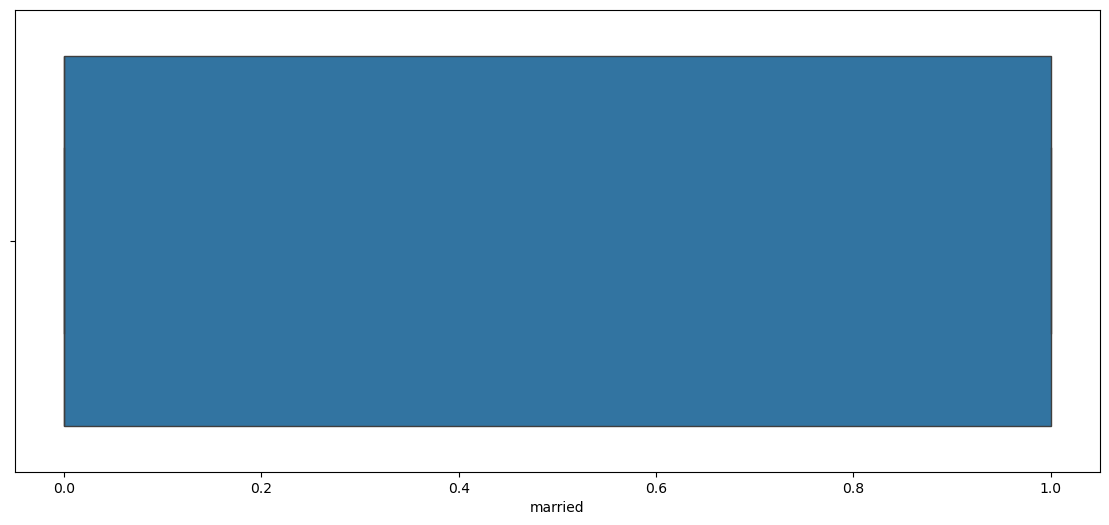

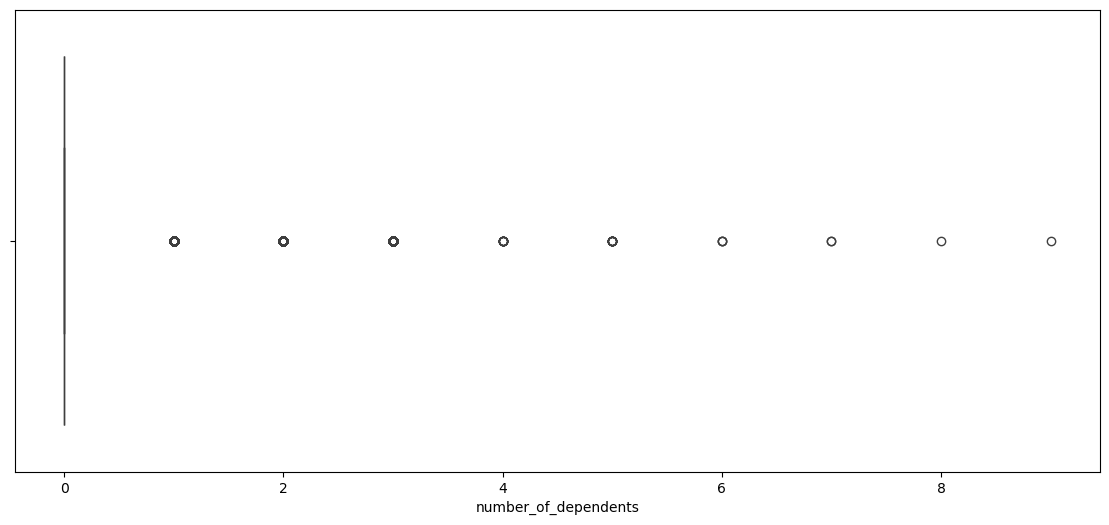

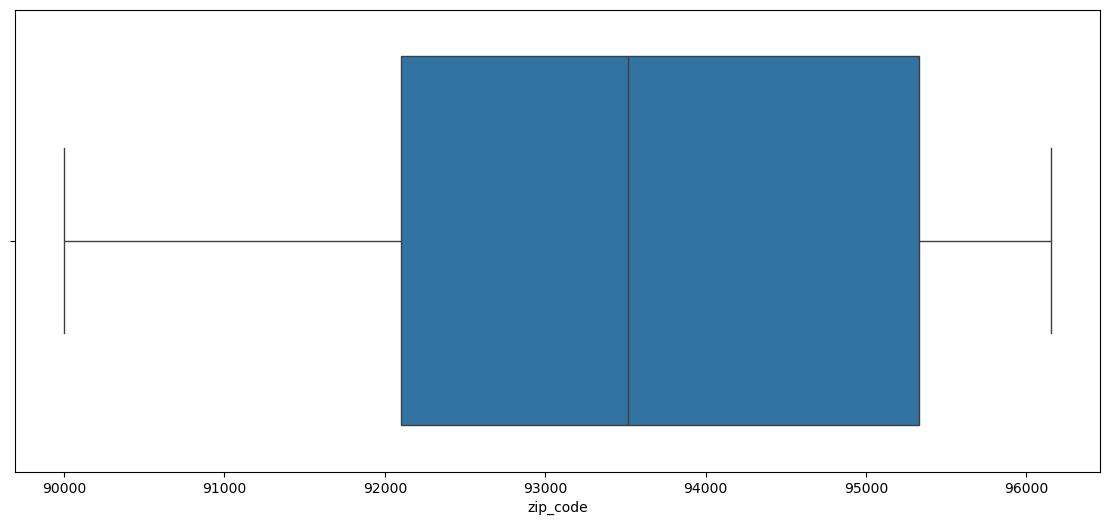

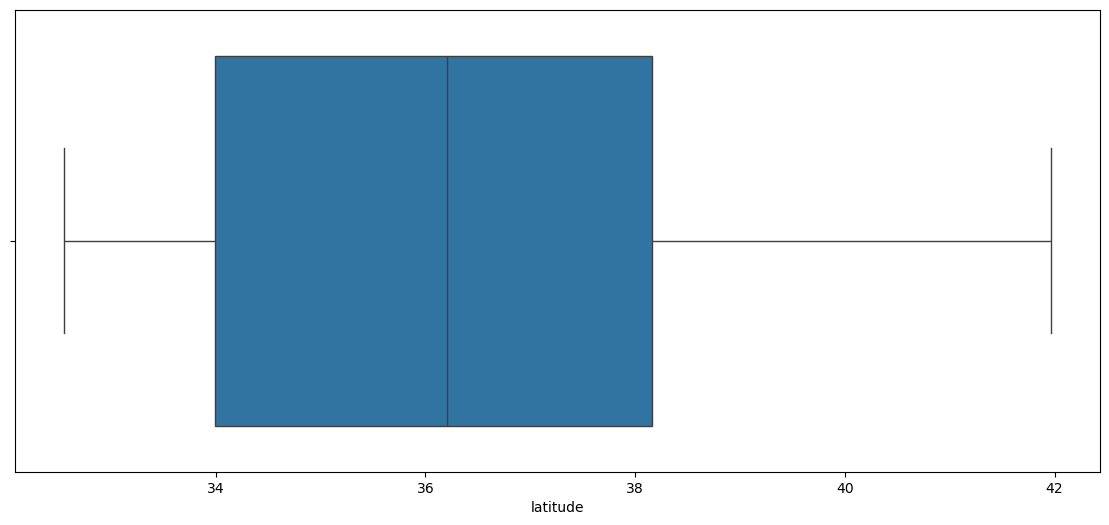

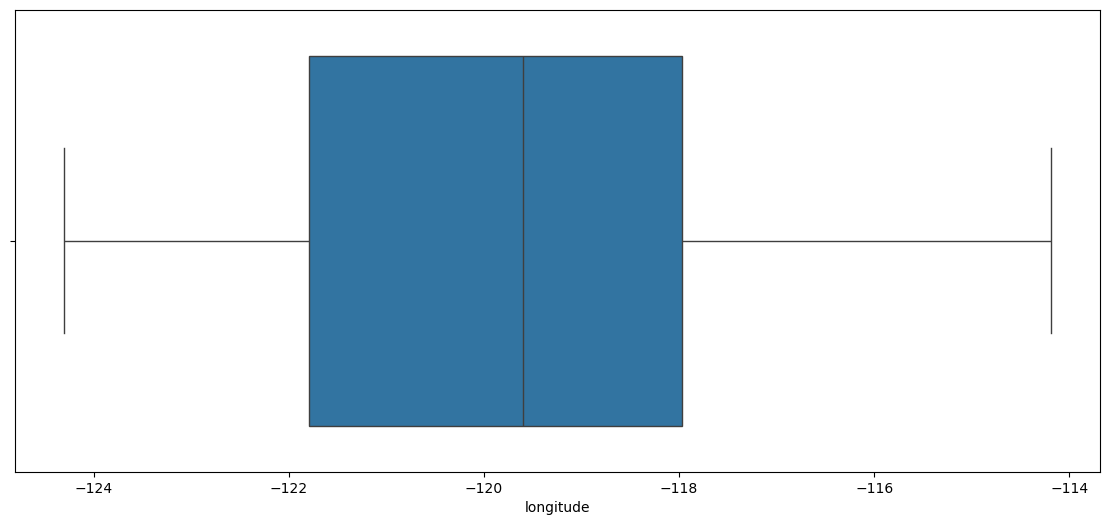

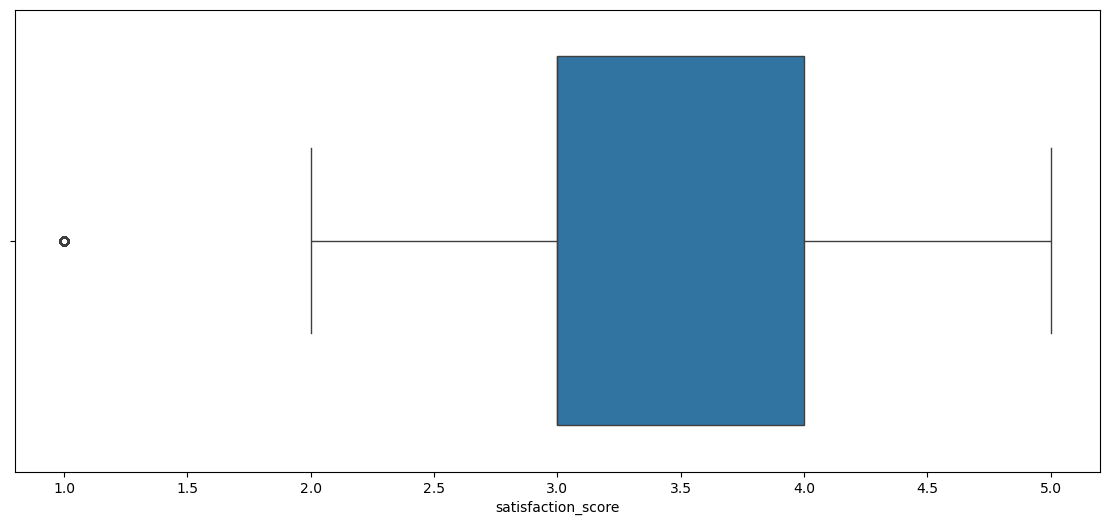

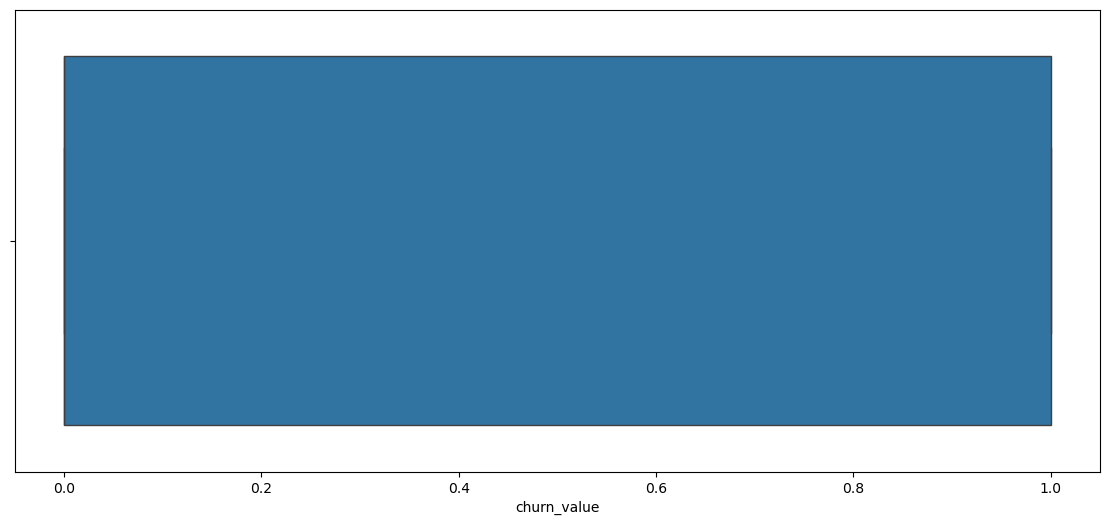

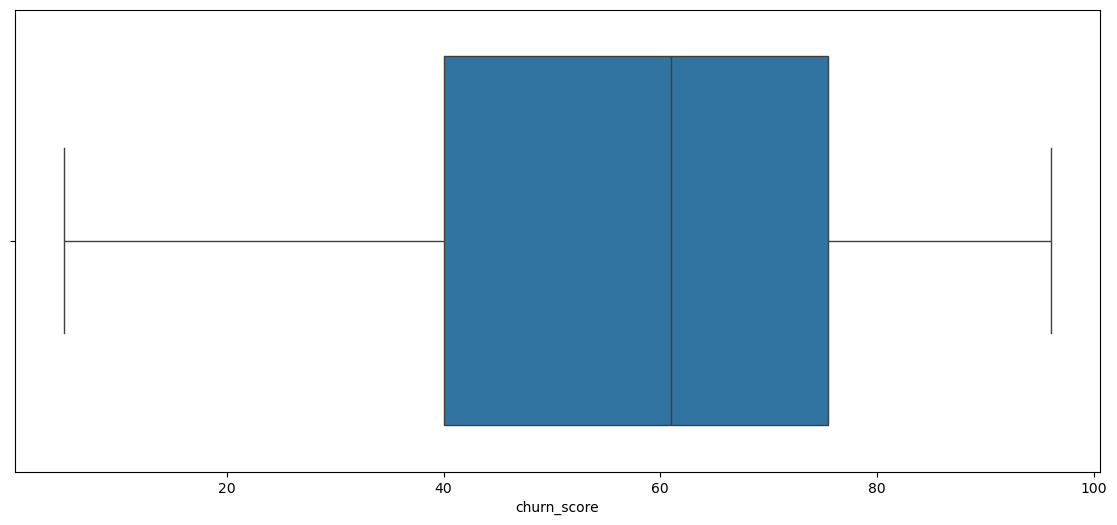

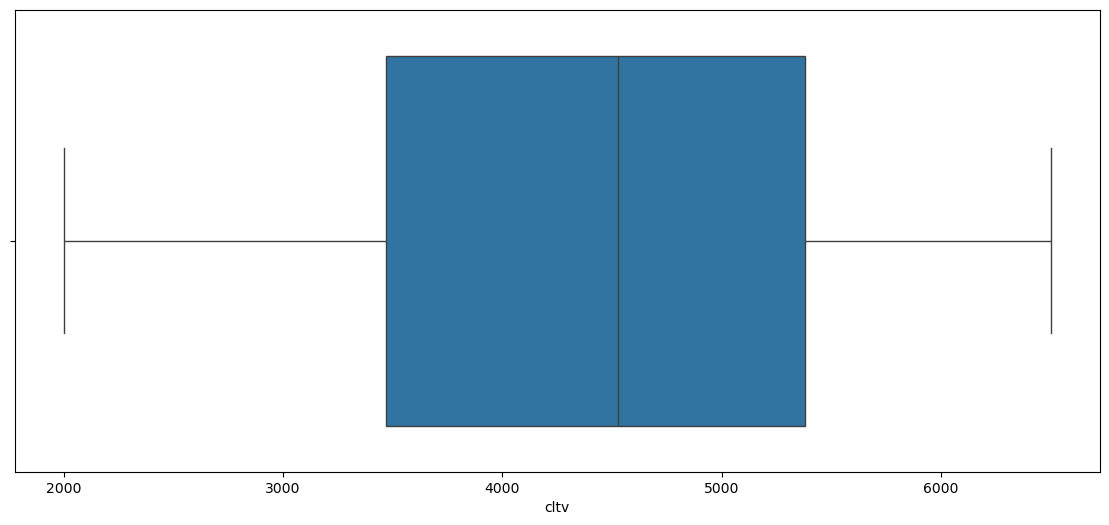

In [402]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6))
    sns.boxplot(ax = ax1, data = df_numerical_variables, x = col)
plt.close()
#Using boxplots to better visualize the outliers

In [403]:
for col in ['number_of_dependents', 'total_extra_data_charges', 'total_refunds']:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: number_of_dependents
shape: (10, 1)
┌──────────────────────┐
│ number_of_dependents │
│ ---                  │
│ i64                  │
╞══════════════════════╡
│ 3                    │
│ 0                    │
│ 9                    │
│ 6                    │
│ 1                    │
│ 7                    │
│ 4                    │
│ 2                    │
│ 8                    │
│ 5                    │
└──────────────────────┘

Coluna: total_extra_data_charges
shape: (16, 1)
┌──────────────────────────┐
│ total_extra_data_charges │
│ ---                      │
│ i64                      │
╞══════════════════════════╡
│ 140                      │
│ 0                        │
│ 30                       │
│ 60                       │
│ 90                       │
│ …                        │
│ 130                      │
│ 20                       │
│ 50                       │
│ 80                       │
│ 110                      │
└──────────────────────────┘

Coluna: total

## Pre-Processing

In [404]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [405]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (7_043, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 5120-ZBLAI  │
│ 3750-CKVKH  │
│ 8975-SKGRX  │
│ 1384-RCUXW  │
│ 5995-SNNEW  │
│ …           │
│ 3143-ILDAL  │
│ 5701-GUXDC  │
│ 0623-EJQEG  │
│ 9233-PSYHO  │
│ 4558-CGYCZ  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ None    │
│ Offer D │
│ Offer B │
│ Offer C │
│ Offer A │
│ Offer E │
└─────────┘

Coluna: phone_service
shape: (2, 1)
┌───────────────┐
│ phone_service │
│ ---           │
│ str           │
╞═══════════════╡
│ Yes           │
│ No            │
└───────────────┘

Coluna: multiple_lines
shape: (2, 1)
┌────────────────┐
│ multiple_lines │
│ ---            │
│ str            │
╞════

C:\Users\Danie\AppData\Local\Temp\ipykernel_44872\2074748385.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


### Solve Outliers

In [406]:
q1, q3 = df.select([
    pl.col("number_of_referrals").quantile(0.25).alias("q1"),
    pl.col("number_of_referrals").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("number_of_referrals")
      .clip(upper_bound=upper_bound)
)

In [407]:
q1, q3 = df.select([
    pl.col("avg_monthly_gb_download").quantile(0.25).alias("q1"),
    pl.col("avg_monthly_gb_download").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("avg_monthly_gb_download")
      .clip(upper_bound=upper_bound)
)

In [408]:
q1, q3 = df.select([
    pl.col("total_long_distance_charges").quantile(0.25).alias("q1"),
    pl.col("total_long_distance_charges").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_long_distance_charges")
      .clip(upper_bound=upper_bound)
)

In [409]:
q1, q3 = df.select([
    pl.col("total_revenue").quantile(0.25).alias("q1"),
    pl.col("total_revenue").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_revenue")
      .clip(upper_bound=upper_bound)
)

In [410]:
q1, q3 = df.select([
    pl.col("satisfaction_score").quantile(0.25).alias("q1"),
    pl.col("satisfaction_score").quantile(0.75).alias("q3")
]).row(0)

lower_bound = q1 - (q3 - q1) * 1.5

df = df.with_columns(
    pl.when(pl.col("satisfaction_score") < lower_bound)
      .then(pl.lit(lower_bound))
      .otherwise(pl.col("satisfaction_score"))
      .alias("satisfaction_score")
)

### Encoding variables

In [411]:
valid_vals = ["yes", "no", "male", "female"]

for col in bivalue_columns:
    df = df.with_columns(
        pl.col(col).str.to_lowercase().str.strip_chars()
    )

    mode_val = (
        df
        .filter(pl.col(col).is_in(valid_vals))
        .select(pl.col(col).mode())
        .item()
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(valid_vals))
            .then(pl.col(col))
            .otherwise(pl.lit(mode_val))
            .alias(col)
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(["yes", "male"]))
            .then(1)
          .when(pl.col(col).is_in(["no", "female"]))
            .then(0)
          .otherwise(None)
          .cast(pl.Int32)
          .alias(col)
    )



In [367]:
df

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64
"""8779-QRDMV""",0,0,1,"""None""",0,0.0,0,1,"""DSL""",8,0,0,1,0,0,1,0,0,"""Month-to-Month""",1,"""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,1,78,null,1,0,0,"""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,1,"""Q3""",3.0,"""Churned""",1,1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,1,8,"""Offer E""",1,48.85,1,1,"""Fiber Optic""",17,0,1,0,0,0,0,0,1,"""Month-to-Month""",1,"""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,0,74,null,1,1,1,"""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,1,"""Q3""",3.0,"""Churned""",1,1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",0,0,18,"""Offer D""",1,11.33,1,1,"""Fiber Optic""",52,0,0,0,0,1,1,1,1,"""Month-to-Month""",1,"""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,1,71,null,1,0,3,"""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,1,"""Q3""",2.0,"""Churned""",1,1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,1,25,"""Offer C""",1,19.76,0,1,"""Fiber Optic""",12,0,1,1,0,1,1,0,1,"""Month-to-Month""",1,"""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,0,78,null,1,1,1,"""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,1,"""Q3""",2.0,"""Churned""",1,1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,1,37,"""Offer C""",1,6.33,1,1,"""Fiber Optic""",14,0,0,0,0,0,0,0,1,"""Month-to-Month""",1,"""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,0,80,null,1,1,1,"""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,1,"""Q3""",2.0,"""Churned""",1,1,67,2793,"""Price""","""Extra data charges""",26265
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2569-WGERO""",0,0,72,"""None""",1,22.77,0,0,"""None""",0,0,0,0,0,0,0,0,0,"""Two Year""",1,"""Bank Withdrawal""",21.15,1419.4,19.31,0,1639.44,3039.53,0,30,null,0,0,0,"""Landers""",92285,"""34.341737, -116.539416""",34.341737,-116.539416,1,"""Q3""",5.0,"""Stayed""",0,0,45,5306,"""NO_LABEL""","""NO_LABEL""",2182
"""6840-RESVB""",1,1,24,"""Offer C""",1,36.05,1,1,"""Cable""",24,1,0,1,1,1,1,1,1,"""One Year""",1,"""Mailed Check""",84.8,1990.5,48.23,0,865.2,2807.47,1,38,null,0,1,2,"""Adelanto""",92301,"""34.667815, -117.536183""",34.667815,-117.536183,1,"""Q3""",3.0,"""Stayed""",0,0,59,2140,"""NO_LABEL""","""NO_LABEL""",18980
"""2234-XADUH""",1,4,72,"""None""",1,29.66,1,1,"""Fiber Optic""",59,0,1,1,0,1,1,1,1,"""One Year""",1,"""Credit Card""",103.2,7362.9,45.38,0,2135.52,9453.04,0,30,null,0,1,2,"""Amboy""",92304,"""34.559882, -115.637164""",34.559882,-115.637164,1,"""Q3""",4.0,"""Stayed""",0,0,71,5560,"""NO_LABEL""","""NO_LABEL""",42


### Double check for null values and duplicates after these all transformations

In [414]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [413]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,i64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,i64


In [368]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    if col not in bivalue_columns:
        print(f"Coluna: {col}")
        print(df.select(col).unique())
        print()

Coluna: customer_id
shape: (7_043, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 1360-JYXKQ  │
│ 0404-SWRVG  │
│ 5092-STPKP  │
│ 7739-LAXOG  │
│ 3489-HHPFY  │
│ …           │
│ 8541-QVFKM  │
│ 8189-XRIKE  │
│ 3292-PBZEJ  │
│ 9248-OJYKK  │
│ 1842-EZJMK  │
└─────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ None    │
│ Offer C │
│ Offer B │
│ Offer E │
│ Offer D │
│ Offer A │
└─────────┘

Coluna: internet_type
shape: (4, 1)
┌───────────────┐
│ internet_type │
│ ---           │
│ str           │
╞═══════════════╡
│ DSL           │
│ Cable         │
│ None          │
│ Fiber Optic   │
└───────────────┘

Coluna: contract
shape: (3, 1)
┌────────────────┐
│ contract       │
│ ---            │
│ str            │
╞════════════════╡
│ Month-to-Month │
│ One Year       │
│ Two Year       │
└────────────────┘

Coluna: payment_method
shape: (3, 1)
┌─────────────────┐
│ payment_method  │
│ ---             │

C:\Users\Danie\AppData\Local\Temp\ipykernel_44872\182089192.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


In [369]:
valid_vals = ["Offer A", "Offer B", "Offer C","Offer D", "Offer E"]
col = "offer"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Offer A")
        .then(1)
        .when(pl.col(col) == "Offer B")
        .then(2)
        .when(pl.col(col) == "Offer C")
        .then(3)
        .when(pl.col(col) == "Offer D")
        .then(4)
        .when(pl.col(col) == "Offer E")
        .then(5)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [370]:
valid_vals = ["DSL", "Cable", "Fiber Optic"]
col = "internet_type"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "DSL")
        .then(1)
        .when(pl.col(col) == "Cable")
        .then(2)
        .when(pl.col(col) == "Fiber Optic")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [371]:
valid_vals = ["Month-to-Month", "One Year", "Two Year"]
col = "contract"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Month-to-Month")
        .then(1)
        .when(pl.col(col) == "One Year")
        .then(2)
        .when(pl.col(col) == "Two Year")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [372]:
valid_vals = ["Churned", "Joined", "Stayed"]
col = "customer_status"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Churned")
        .then(0)
        .when(pl.col(col) == "Joined")
        .then(1)
        .when(pl.col(col) == "Stayed")
        .then(2)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [373]:
col = "churn_category"

df = df.with_columns(
    pl.when(pl.col(col) == "NO_LABEL")
        .then(pl.lit("Other"))
        .otherwise(pl.col(col))
        .alias(col)
)

In [374]:
df = df.to_dummies(columns=["payment_method"])#.drop("payment_method")

In [375]:
df = df.to_dummies(columns=["churn_category"])

### Droping variables based on correlaction, univalue variable and entire null variable

In [376]:
df = df.drop(['customer_id','under_30', 'count', 'quarter', 'lat_long',	'latitude',	'longitude', 'married', 'total_long_distance_charges', 'tenure_in_months', 'city', 'churn_reason'])

In [377]:
df

referred_a_friend,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,senior_citizen,number_of_dependents,zip_code,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
i32,i64,i32,i32,f64,i32,i32,i32,i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,i64,f64,i32,i64,i64,i64,i64,f64,i32,i32,i64,i64,i64,u8,u8,u8,u8,u8,i64
0,0,2,0,0.0,0,1,1,8,0,0,1,0,0,1,0,0,1,1,1,0,0,39.65,39.65,0.0,20,59.65,1,78,1,0,90022,3.0,0,1,1,91,5433,0,1,0,0,0,68701
1,1,5,1,48.85,1,1,3,17,0,1,0,0,0,0,0,1,1,1,0,1,0,80.65,633.3,0.0,0,1024.1,0,74,1,1,90063,3.0,0,1,1,69,5302,0,1,0,0,0,55668
0,0,4,1,11.33,1,1,3,52,0,0,0,0,1,1,1,1,1,1,1,0,0,95.45,1752.55,45.61,0,1910.88,1,71,1,3,90065,2.0,0,1,1,81,3179,0,1,0,0,0,47534
1,1,3,1,19.76,0,1,3,12,0,1,1,0,1,1,0,1,1,1,1,0,0,98.5,2514.5,13.43,0,2995.07,0,78,1,1,90303,2.0,0,1,1,88,5337,0,0,1,0,0,27778
1,1,3,1,6.33,1,1,3,14,0,0,0,0,0,0,0,1,1,1,1,0,0,76.5,2868.15,0.0,0,3102.36,0,80,1,1,90602,2.0,0,1,1,67,2793,0,0,0,0,1,26265
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0,2,1,22.77,0,0,3,0,0,0,0,0,0,0,0,0,3,1,1,0,0,21.15,1419.4,19.31,0,3039.53,0,30,0,0,92285,5.0,2,0,0,45,5306,0,0,0,1,0,2182
1,1,3,1,36.05,1,1,2,24,1,0,1,1,1,1,1,1,2,1,0,0,1,84.8,1990.5,48.23,0,2807.47,1,38,0,2,92301,3.0,2,0,0,59,2140,0,0,0,1,0,18980
1,4,2,1,29.66,1,1,3,59,0,1,1,0,1,1,1,1,2,1,0,1,0,103.2,7362.9,45.38,0,9453.04,0,30,0,2,92304,4.0,2,0,0,71,5560,0,0,0,1,0,42


### Feature Selection

### Apply Scaling

In [378]:
df_scaled = df.with_columns([
    ((pl.col(c) - df.select(pl.col(c).min()).item()) /
     (df.select(pl.col(c).max()).item() - df.select(pl.col(c).min()).item()))
    .alias(f"{c}")
    for c in df.columns
])

In [379]:
df.schema

Schema([('referred_a_friend', Int32),
        ('number_of_referrals', Int64),
        ('offer', Int32),
        ('phone_service', Int32),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', Int32),
        ('internet_service', Int32),
        ('internet_type', Int32),
        ('avg_monthly_gb_download', Int64),
        ('online_security', Int32),
        ('online_backup', Int32),
        ('device_protection_plan', Int32),
        ('premium_tech_support', Int32),
        ('streaming_tv', Int32),
        ('streaming_movies', Int32),
        ('streaming_music', Int32),
        ('unlimited_data', Int32),
        ('contract', Int32),
        ('paperless_billing', Int32),
        ('payment_method_Bank Withdrawal', UInt8),
        ('payment_method_Credit Card', UInt8),
        ('payment_method_Mailed Check', UInt8),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', In

In [380]:
df_scaled

referred_a_friend,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,senior_citizen,number_of_dependents,zip_code,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.126984,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.212935,0.002406,0.0,0.133333,0.003457,1.0,0.967213,1.0,0.0,0.003415,0.428571,0.0,1.0,1.0,0.945055,0.762731,0.0,1.0,0.0,0.0,0.0,0.652488
1.0,0.142857,1.0,1.0,0.977195,1.0,1.0,1.0,0.269841,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.620896,0.070909,0.0,0.0,0.090542,0.0,0.901639,1.0,0.111111,0.010083,0.428571,0.0,1.0,1.0,0.703297,0.7336,0.0,1.0,0.0,0.0,0.0,0.528687
0.0,0.0,0.75,1.0,0.226645,1.0,1.0,1.0,0.825397,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.768159,0.200063,0.916047,0.0,0.170614,1.0,0.852459,1.0,0.333333,0.010408,0.142857,0.0,1.0,1.0,0.835165,0.261508,0.0,1.0,0.0,0.0,0.0,0.451422
1.0,0.142857,0.5,1.0,0.395279,0.0,1.0,1.0,0.190476,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.798507,0.287988,0.269733,0.0,0.26851,0.0,0.967213,1.0,0.111111,0.049114,0.142857,0.0,1.0,1.0,0.912088,0.741383,0.0,0.0,1.0,0.0,0.0,0.263759
1.0,0.142857,0.5,1.0,0.126625,1.0,1.0,1.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.579602,0.328796,0.0,0.0,0.278198,0.0,1.0,1.0,0.111111,0.097739,0.142857,0.0,1.0,1.0,0.681319,0.175673,0.0,0.0,0.0,0.0,1.0,0.249387
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.25,1.0,0.455491,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.028856,0.16162,0.387829,0.0,0.272525,0.0,0.180328,0.0,0.0,0.371443,1.0,1.0,0.0,0.0,0.43956,0.73449,0.0,0.0,0.0,1.0,0.0,0.020622
1.0,0.142857,0.5,1.0,0.721144,1.0,1.0,0.5,0.380952,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.662189,0.227521,0.968668,0.0,0.251571,1.0,0.311475,0.0,0.222222,0.374045,0.428571,1.0,0.0,0.0,0.593407,0.030465,0.0,0.0,0.0,1.0,0.0,0.180187
1.0,0.571429,0.25,1.0,0.593319,1.0,1.0,1.0,0.936508,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,0.0,0.845274,0.847461,0.911428,0.0,0.851631,0.0,0.180328,0.0,0.222222,0.374532,0.714286,1.0,0.0,0.0,0.725275,0.790972,0.0,0.0,0.0,1.0,0.0,0.000294
